In [1]:
import pandas as pd
import numpy as np

In [2]:
df_hr=pd.read_csv('/content/Dataset - HR Employee Attrition.csv')


In [3]:
first_array = df_hr.iloc[0]
first_column_name = df_hr.columns[0]

print(f"First array: {first_array}")
print(f"Corresponding column name: {first_column_name}")

First array: EmployeeNumber                            1
Attrition                               Yes
Age                                      41
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime           

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

<Axes: >

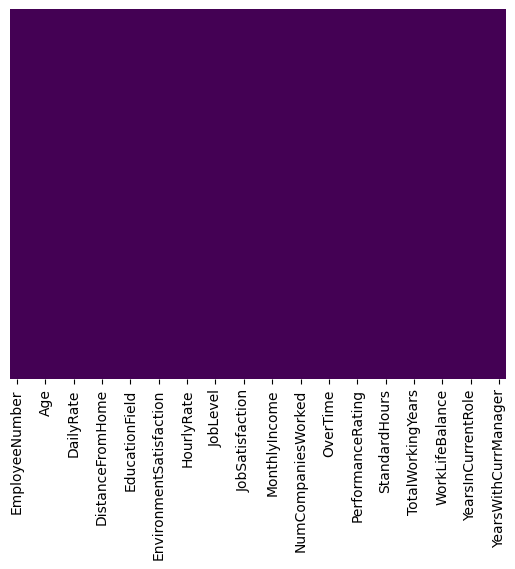

In [5]:
import seaborn as sns
sns.heatmap(df_hr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# this means there are no null values in the dataset

In [7]:
numerical_features = [feature for feature in df_hr.columns if df_hr[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_hr[numerical_features].head()

Number of numerical variables:  26


,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
discrete_feature=[feature for feature in numerical_features if len(df_hr[feature].unique())<25 and feature not in year_feature+['Id'] ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [11]:
categorical_features = [feature for feature in df_hr.columns if df_hr[feature].dtypes == 'O']

categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [12]:
continuous_feature
# continuous features in numerical features

['EmployeeNumber',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

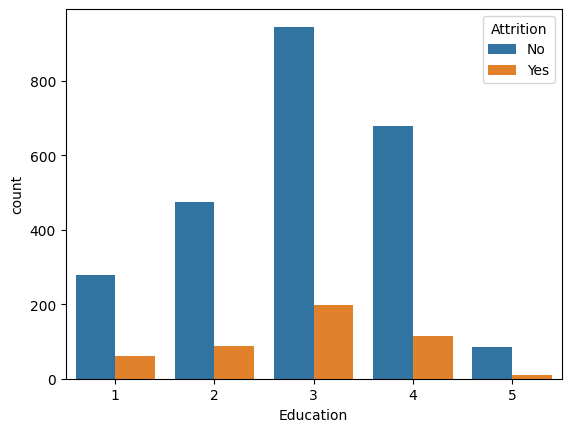

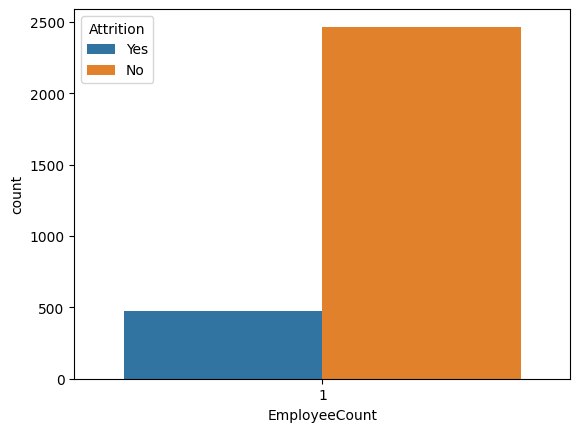

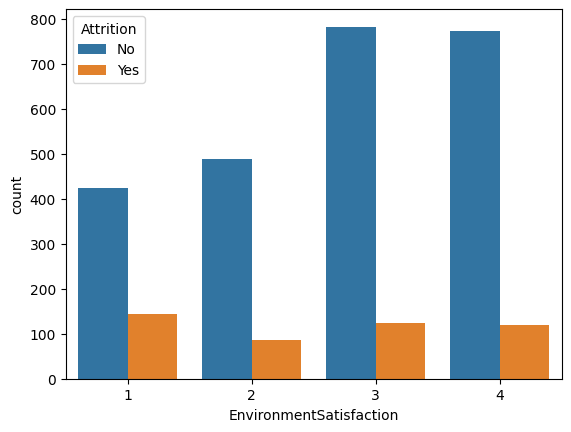

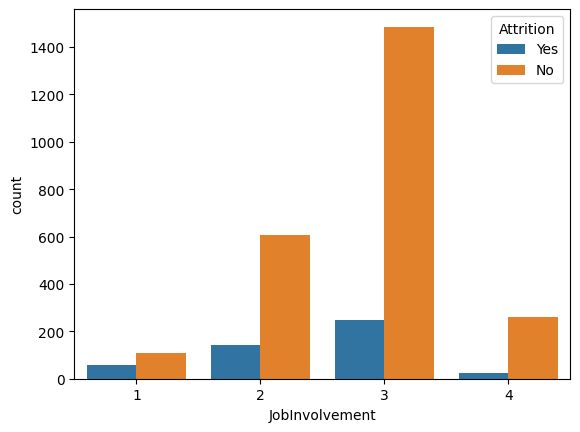

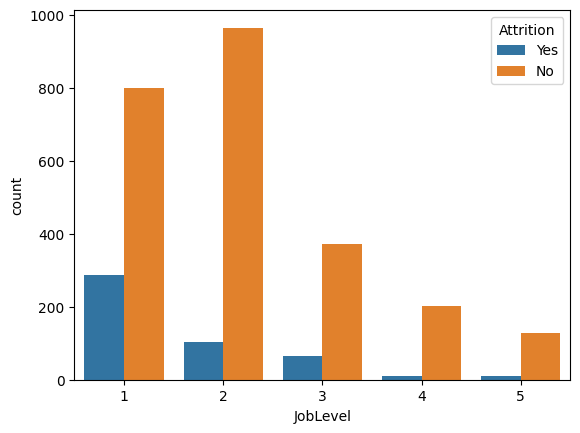

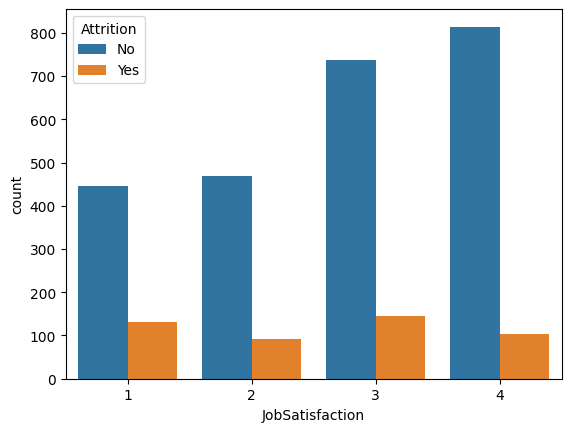

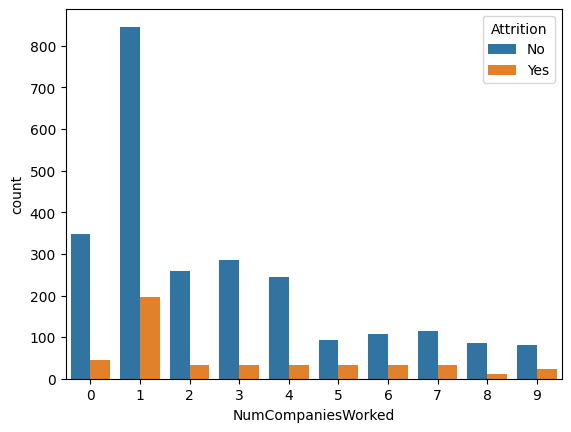

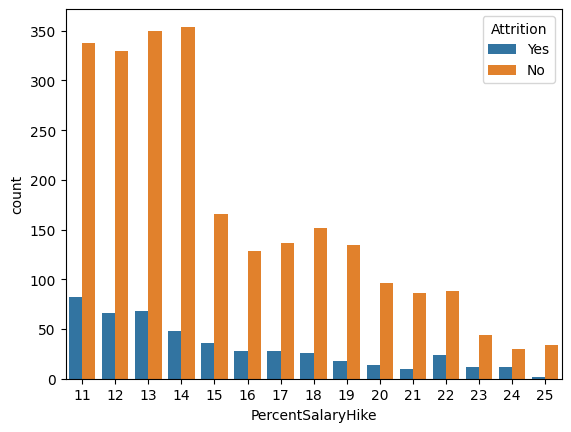

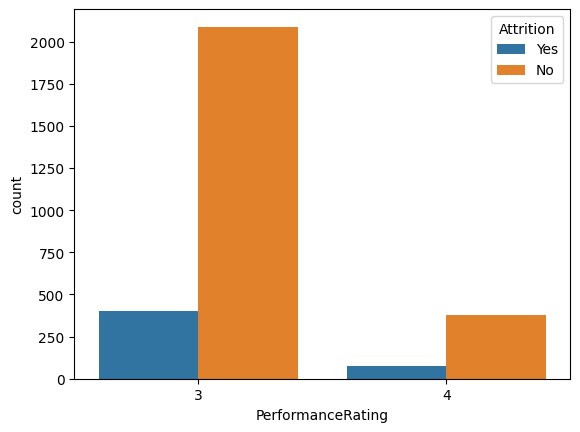

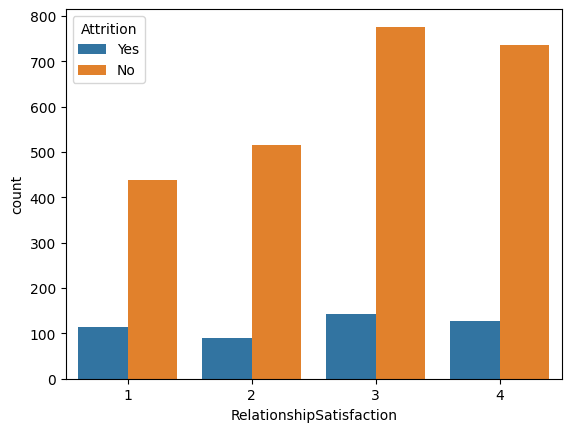

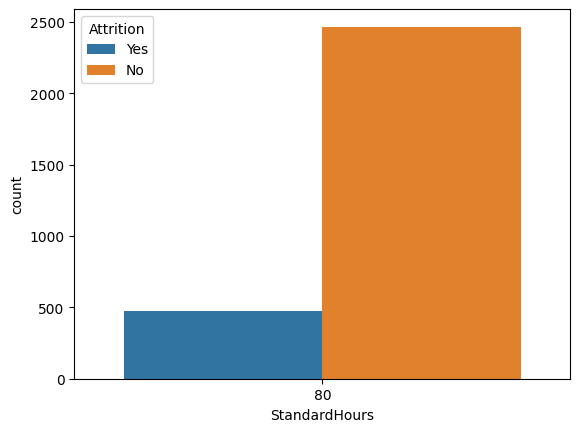

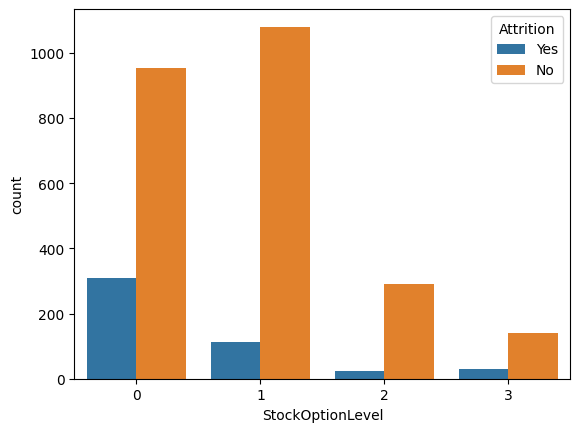

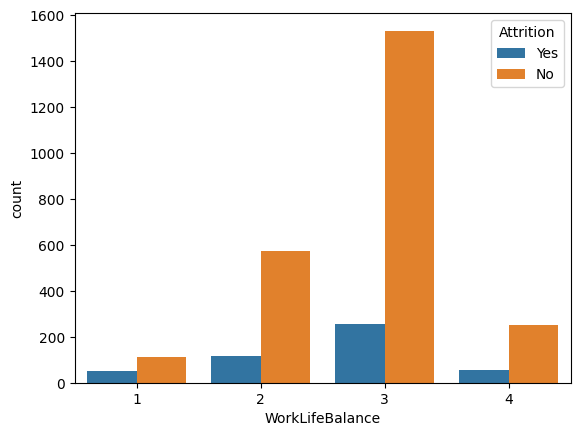

In [14]:
for feature in discrete_feature:
    sns.countplot(x=feature ,data=df_hr,hue='Attrition') # Indent this line with 4 spaces
    plt.show() # Add this line to display each plot separately

**Observations:**
1. for higher eduction nex low attrition
2. Employee with greater Environment Satisfaction suffer through less percentage of attrition
3. With greater job involvement percentage of attrition decreases
4. As job level increases lesser attrition observed
5. with job satisfaction increase percentage of attrition employee decrease
6. Employees that have worked in 5 or more companies have more attrition
7. With more Salary hike more employess undergo attrition
(as percentage)
8.Ignore employee count
9.Standard hours have no involvement


Group Rare Categories: For very rare classes, you may consider grouping them to reduce sparsity or improve model performance.

DROP FEATURE WITHOUT ANY VARIATION AT ALL

In [15]:
# Verify if the columns still exist in the DataFrame
if 'EmployeeCount' in df_hr.columns and 'StandardHours' in df_hr.columns:
    df_hr.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'EmployeeCount' in discrete_feature:
    discrete_feature.remove('EmployeeCount')
if 'StandardHours' in discrete_feature:
    discrete_feature.remove('StandardHours')

In [16]:


for feature in discrete_feature:
  print(f"\nPercentage of Subcategories for {feature}:")
  for category in df_hr[feature].unique():
    count = df_hr[df_hr[feature] == category].shape[0]
    percentage = (count / df_hr.shape[0]) * 100
    print(f"{category}: {percentage:.2f}%")


Percentage of Subcategories for Education:
2: 19.18%
1: 11.56%
4: 27.07%
3: 38.91%
5: 3.27%

Percentage of Subcategories for EnvironmentSatisfaction:
2: 19.52%
3: 30.82%
4: 30.34%
1: 19.32%

Percentage of Subcategories for JobInvolvement:
3: 59.05%
2: 25.51%
4: 9.80%
1: 5.65%

Percentage of Subcategories for JobLevel:
2: 36.33%
1: 36.94%
3: 14.83%
4: 7.21%
5: 4.69%

Percentage of Subcategories for JobSatisfaction:
4: 31.22%
2: 19.05%
3: 30.07%
1: 19.66%

Percentage of Subcategories for NumCompaniesWorked:
8: 3.33%
1: 35.44%
6: 4.76%
9: 3.54%
0: 13.40%
4: 9.46%
5: 4.29%
2: 9.93%
7: 5.03%
3: 10.82%

Percentage of Subcategories for PercentSalaryHike:
11: 14.29%
23: 1.90%
15: 6.87%
12: 13.47%
13: 14.22%
20: 3.74%
22: 3.81%
21: 3.27%
17: 5.58%
14: 13.67%
16: 5.31%
18: 6.05%
19: 5.17%
24: 1.43%
25: 1.22%

Percentage of Subcategories for PerformanceRating:
3: 84.63%
4: 15.37%

Percentage of Subcategories for RelationshipSatisfaction:
1: 18.78%
4: 29.39%
2: 20.61%
3: 31.22%

Percentage of Sub

Feature Selection for Discrete Features

NumCompaniesWorked and PercentSalaryHike : **Here we can club subcategories**

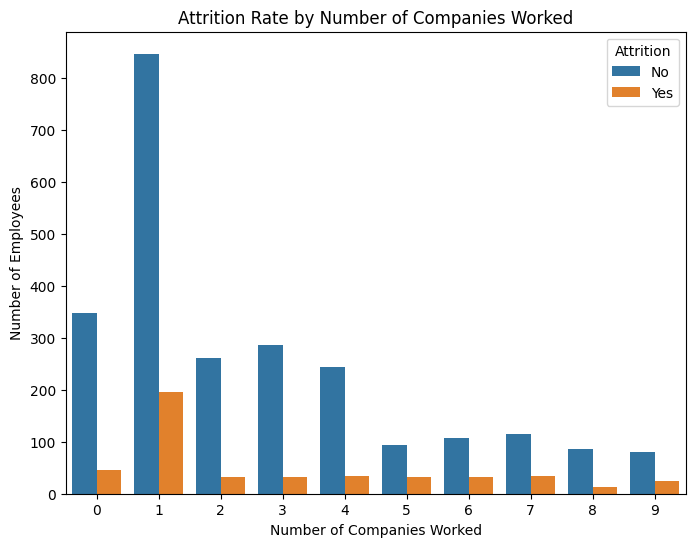

In [17]:
# prompt: plot numcompaniesworked with attrition

plt.figure(figsize=(8, 6))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df_hr)
plt.title('Attrition Rate by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.show()

In [18]:

company_worked_mapping = {
    0: 0,
    1: 1,
    2: 3,
    3: 3,
    4: 3,
    5: 6,
    6: 6,
    7: 6,
    8: 9,
    9: 9
}

# Apply the mapping to the 'NumCompaniesWorked' column
df_hr['NumCompaniesWorked_Category'] = df_hr['NumCompaniesWorked'].map(company_worked_mapping)
df_hr.drop('NumCompaniesWorked', axis=1, inplace=True)
df_hr.rename(columns={'NumCompaniesWorked_Category': 'NumCompaniesWorked'}, inplace=True)

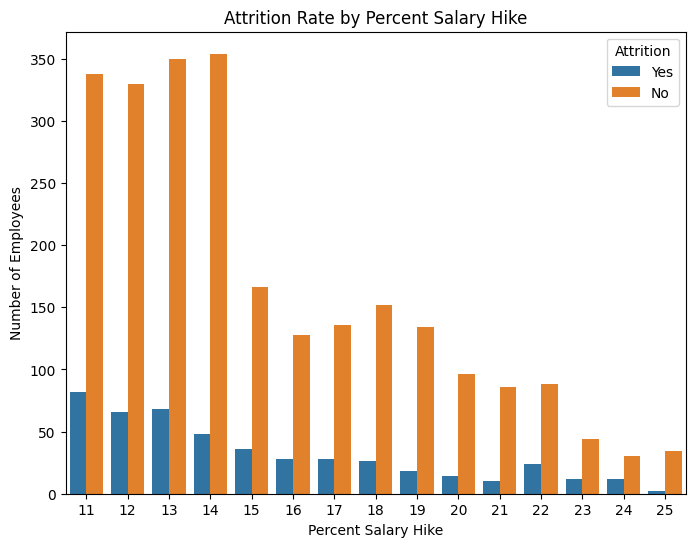

In [19]:


plt.figure(figsize=(8, 6))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df_hr)
plt.title('Attrition Rate by Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Number of Employees')
plt.show()

In [20]:
# prompt: map 11 12 to 12 13 14 to 14 15 to 15 16 to 16 17 18 19 to 18 20 21 22 to 21 23 24 25 to 24

# Create a dictionary to map the PercentSalaryHike to categories
salary_hike_mapping = {
    11: 12,
    12: 14,
    13: 14,
    14: 15,
    15: 16,
    16: 18,
    17: 18,
    18: 18,
    19: 18,
    20: 21,
    21: 21,
    22: 21,
    23: 24,
    24: 24,
    25: 24
}

# Apply the mapping to the 'PercentSalaryHike' column
df_hr['PercentSalaryHike_Category'] = df_hr['PercentSalaryHike'].map(salary_hike_mapping)
df_hr.drop('PercentSalaryHike', axis=1, inplace=True)
df_hr.rename(columns={'PercentSalaryHike_Category': 'PercentSalaryHike'}, inplace=True)

In [21]:


print(f"\nUnique Subcategories for NumCompaniesWorked:")
for category in df_hr['NumCompaniesWorked'].unique():
  print(category)

print(f"\nUnique Subcategories for PercentSalaryHike:")
for category in df_hr['PercentSalaryHike'].unique():
  print(category) # Added indentation to this line


Unique Subcategories for NumCompaniesWorked:
9
1
6
0
3

Unique Subcategories for PercentSalaryHike:
12
24
16
14
21
18
15


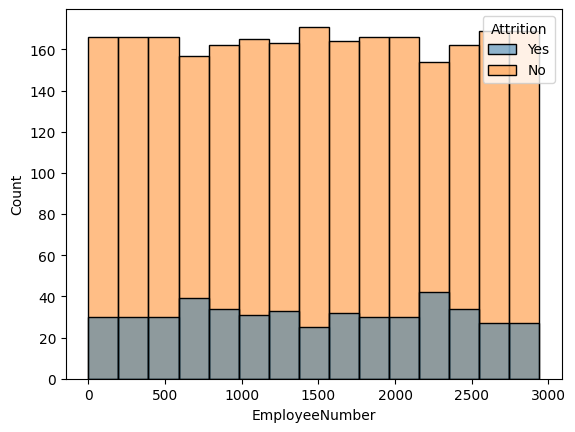

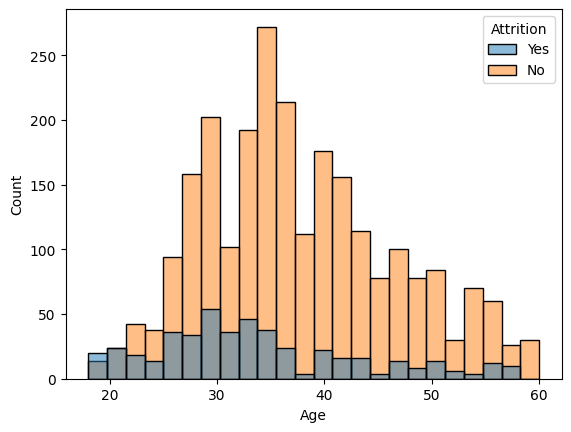

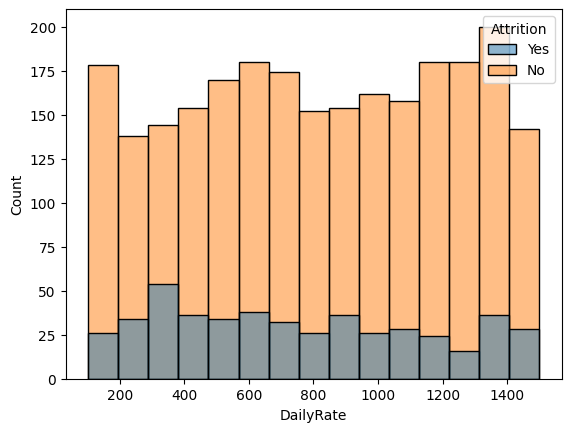

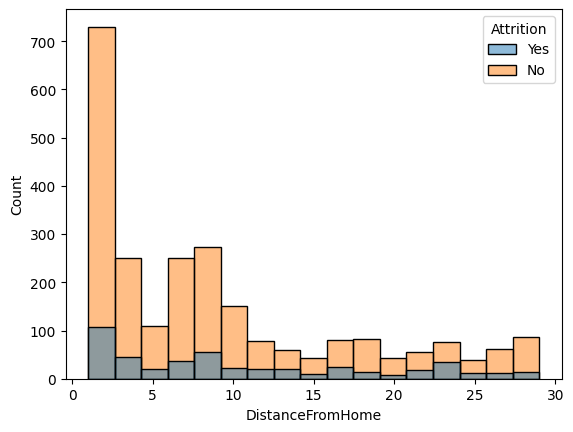

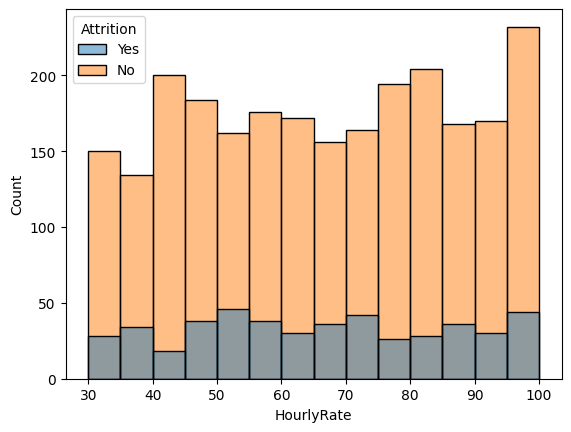

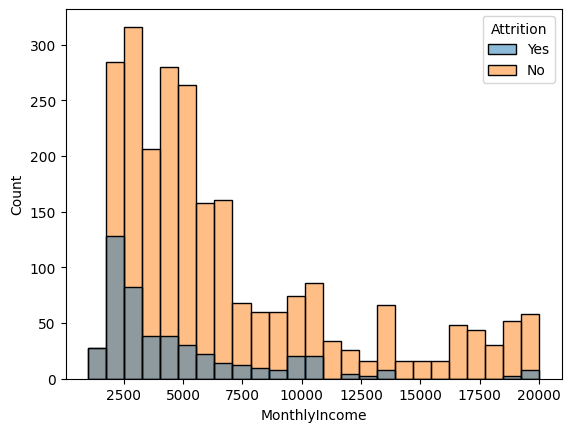

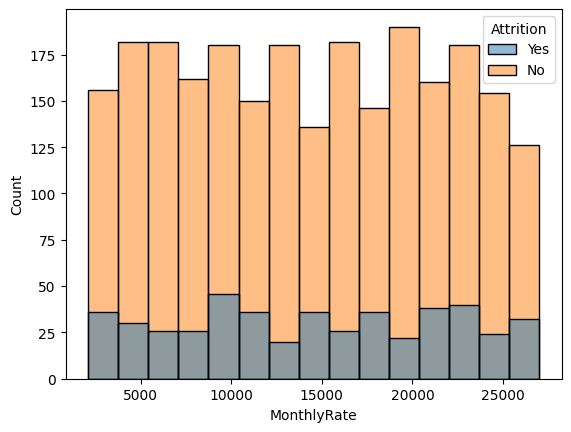

In [22]:
for feature in continuous_feature:
    sns.histplot(x=feature ,data=df_hr,hue='Attrition') # Indent this line with 4 spaces
    plt.show() # Add this line to display each plot separately

TASK:
normal keep as it is.

right/left skewed: apply log normal transformation

Uniform Distribution: corrected after scaling later on

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

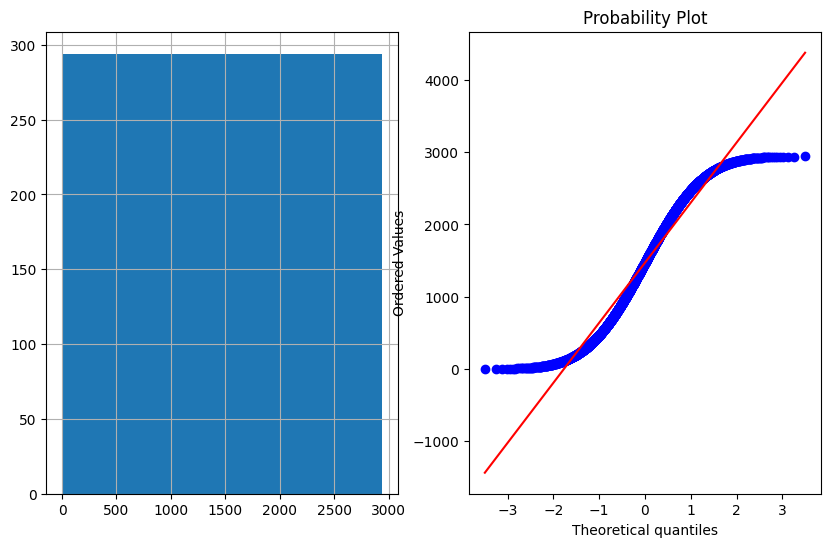

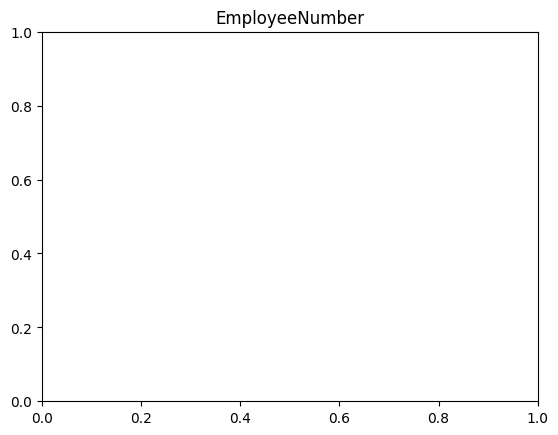

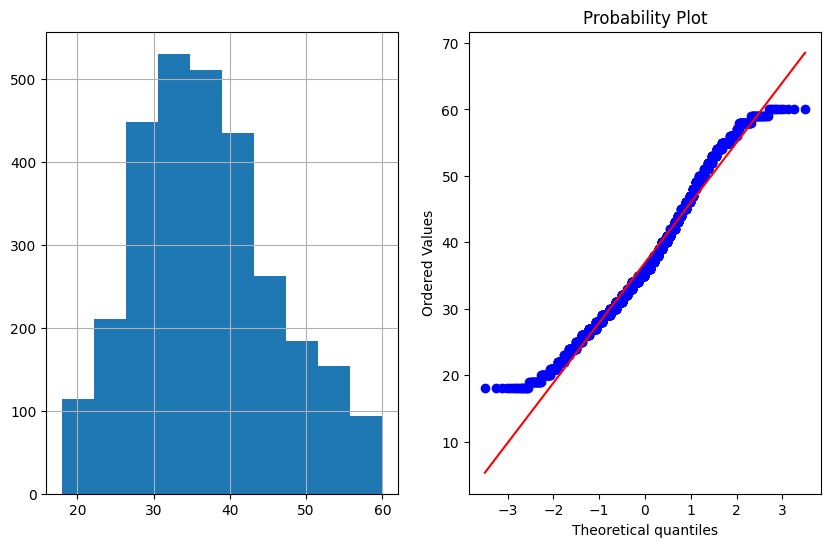

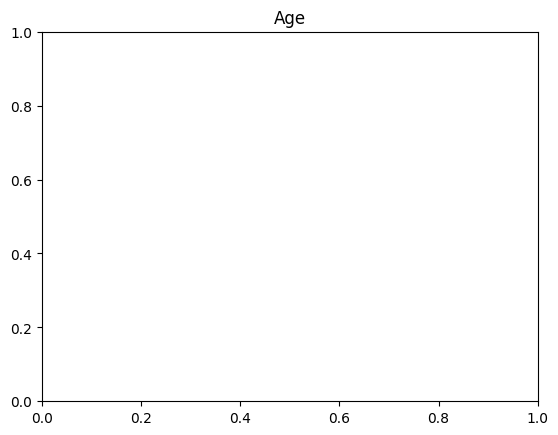

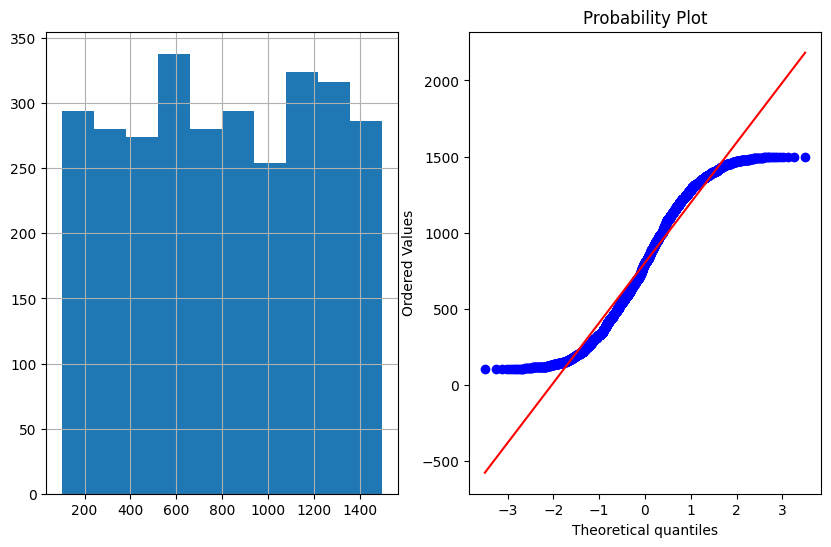

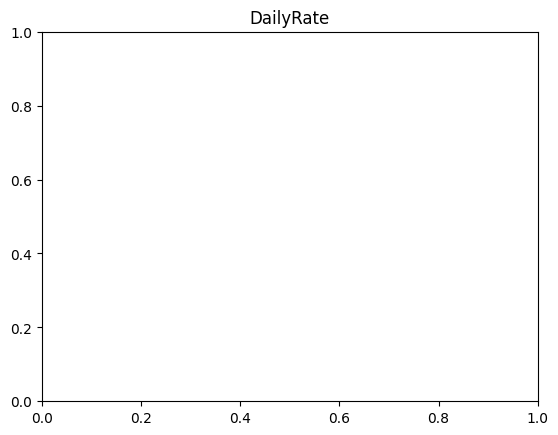

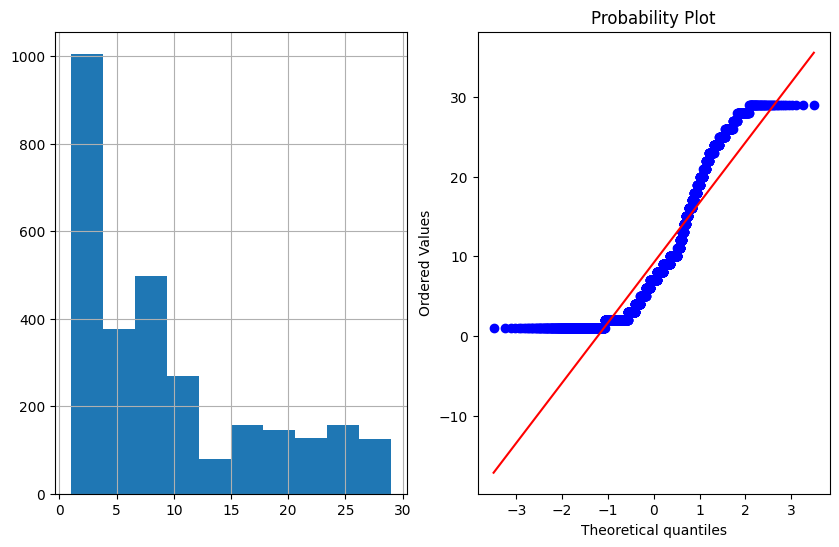

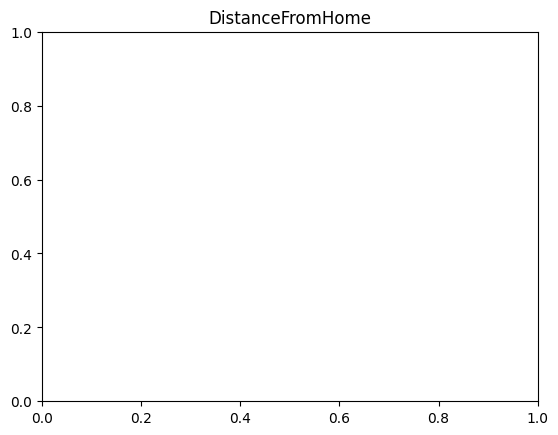

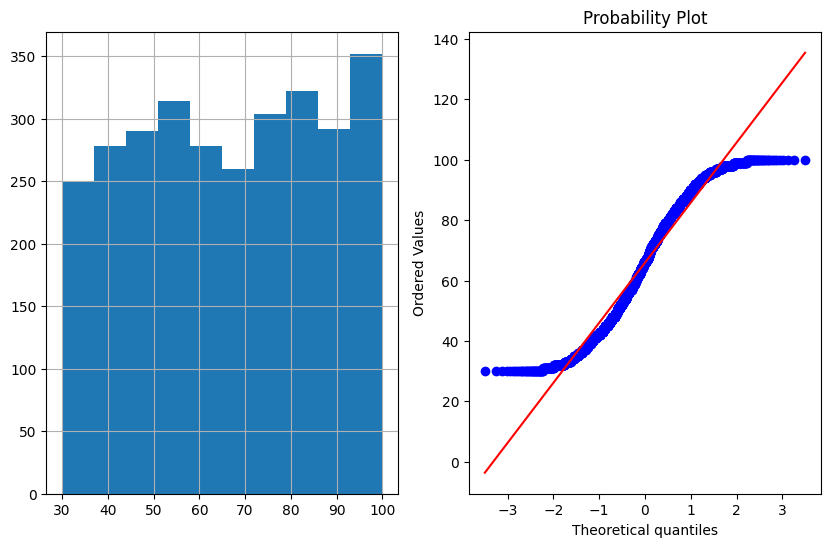

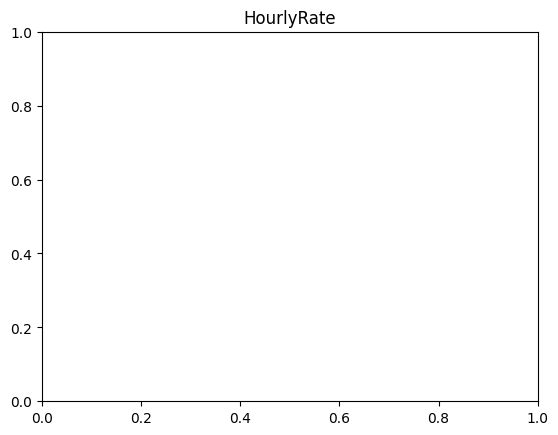

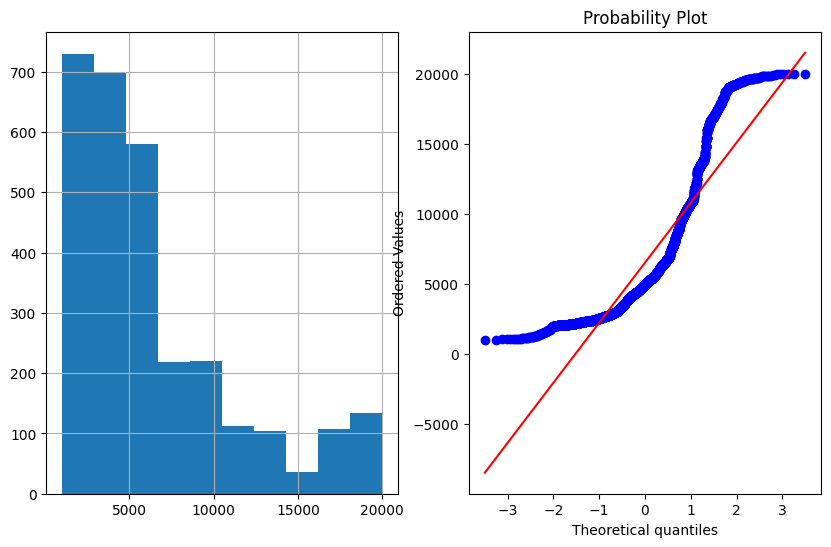

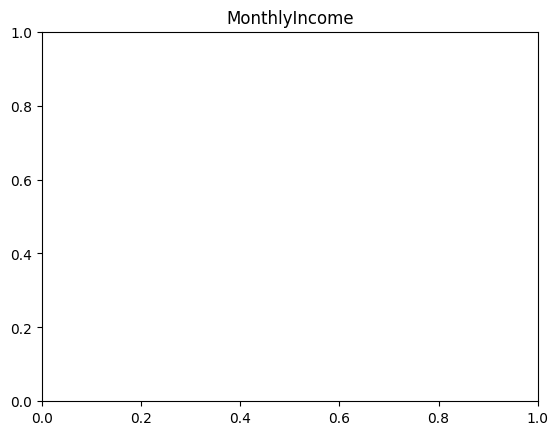

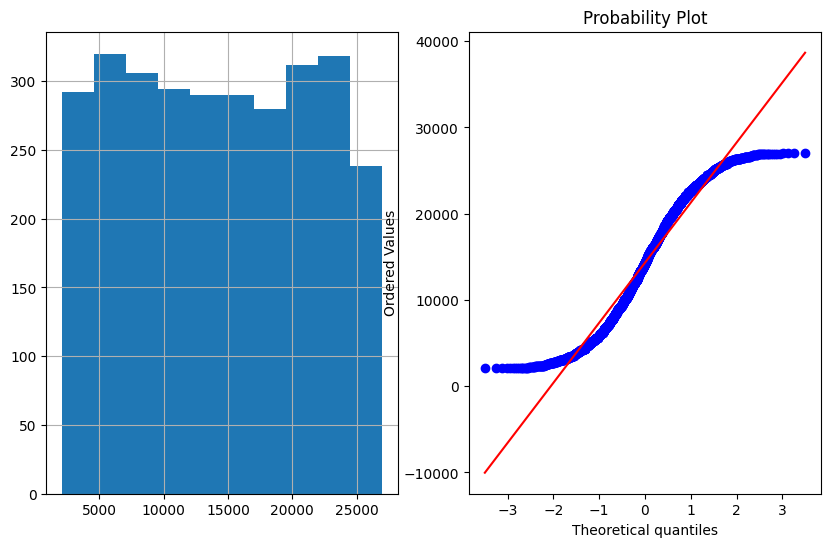

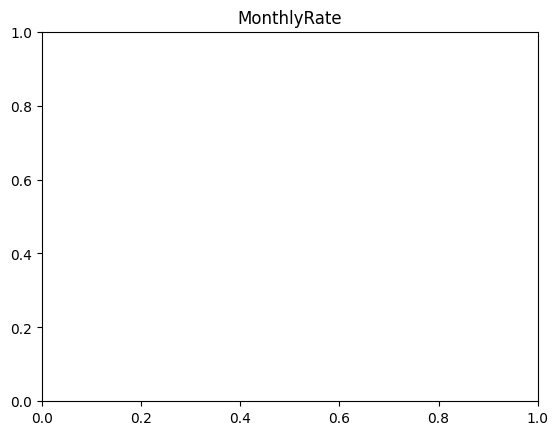

In [24]:


for feature in continuous_feature:
  plot_data(df_hr, feature)
  plt.title(feature)  # Add title to the plot with the feature name
  plt.show()

FROM THIS THE SKEWED DATA FOR LOG TRANSFORMATION IS :


1.   Monthly income
2.   distance from home



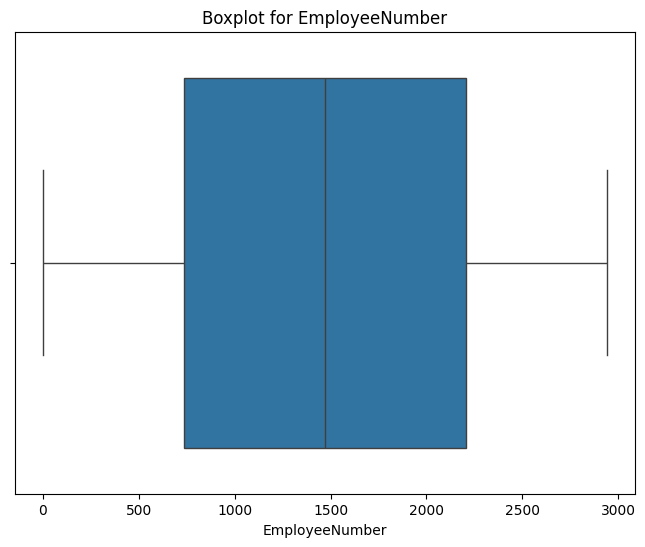

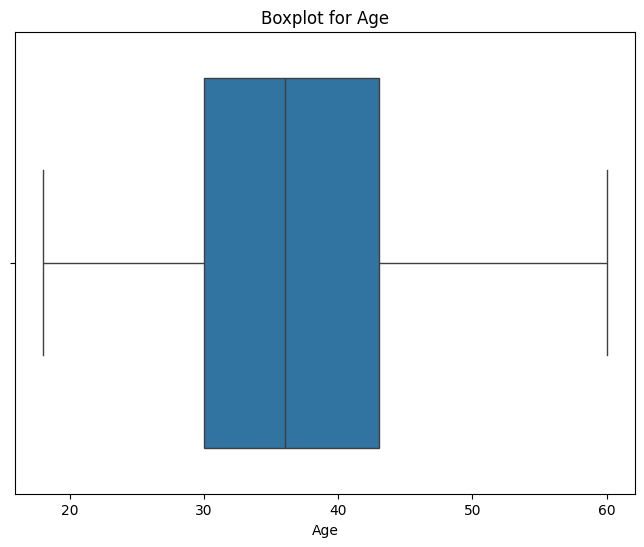

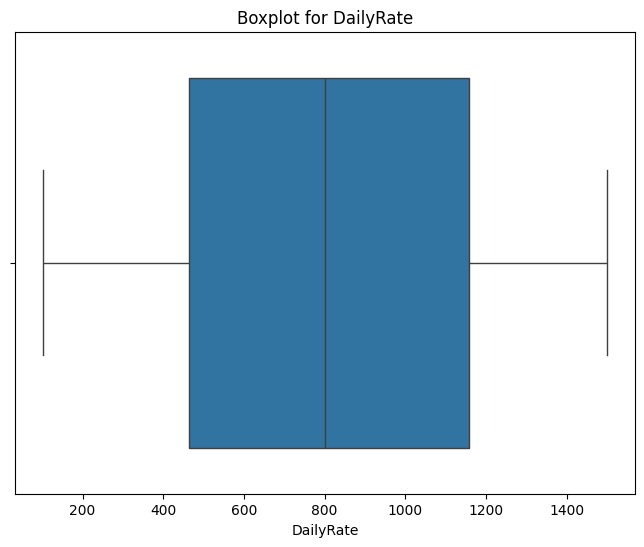

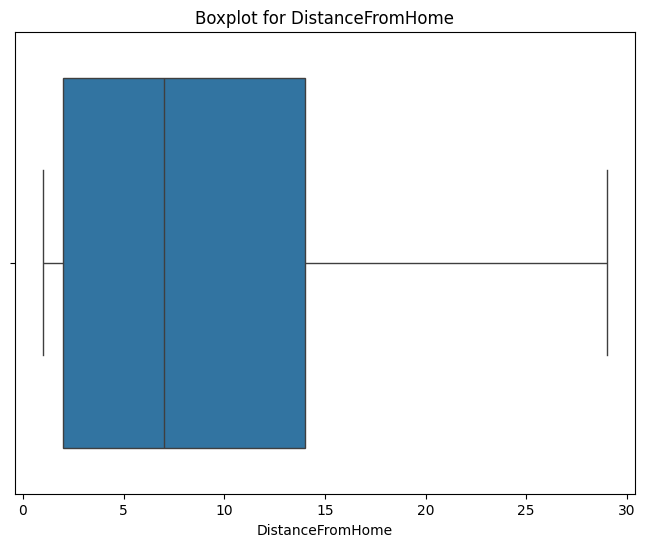

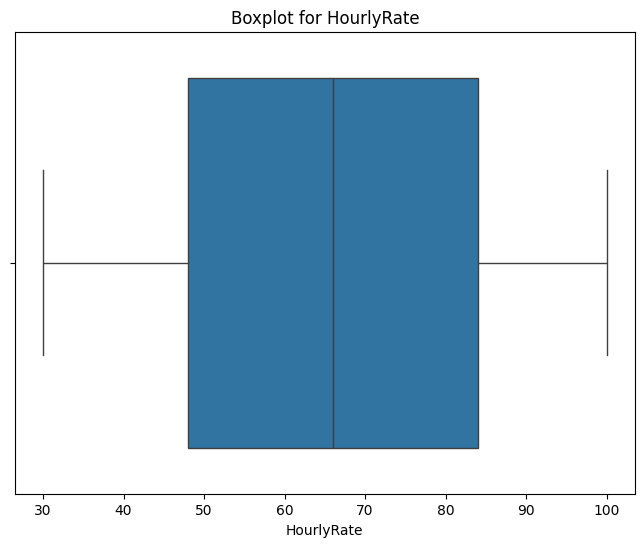

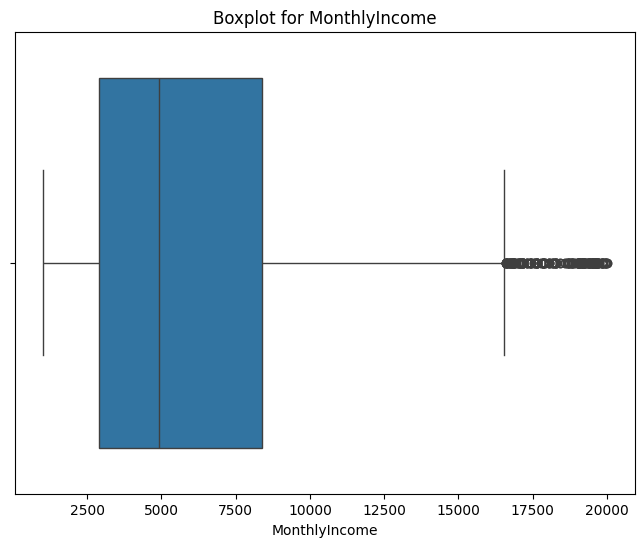

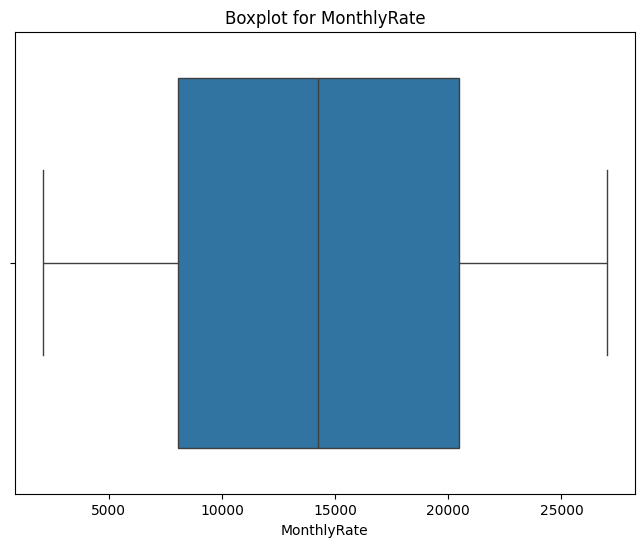

In [25]:
# prompt: compute boxplot for all continuous features

for feature in continuous_feature:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_hr[feature])
  plt.title(f"Boxplot for {feature}")
  plt.show()

SO ONLY 2 COLUMNS NEED TRANSFORMATION

In [26]:


for feature in ['MonthlyIncome', 'DistanceFromHome']:
  df_hr[feature] = np.log1p(df_hr[feature])


EMPLOYEE NUMBER DROPPED

In [27]:
if 'EmployeeNumber' in df_hr.columns :
    df_hr.drop(['EmployeeNumber'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'EmployeeNumber' in continuous_feature:
    continuous_feature.remove('EmployeeNumber')


In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_hr[feature].unique())))

The feature is Attrition and number of categories are 2
The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


since all Y we drop this column OVER18 DROPPED

In [29]:
if 'Over18' in df_hr.columns :
    df_hr.drop(['Over18'],axis=1,inplace=True)

# Verify if the elements still exist in the list
if 'Over18' in continuous_feature:
    categorical_features.remove('Over18')

In [30]:
categorical_features.remove('Over18')

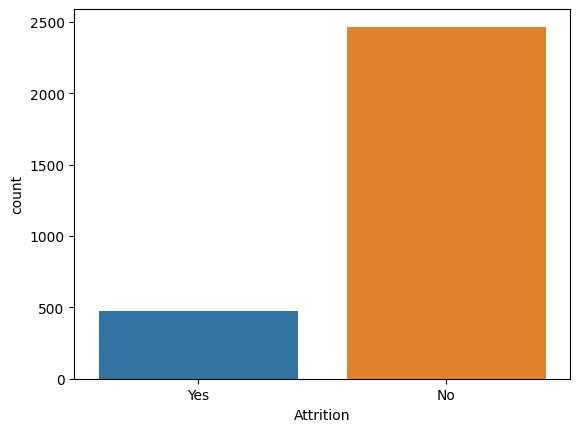

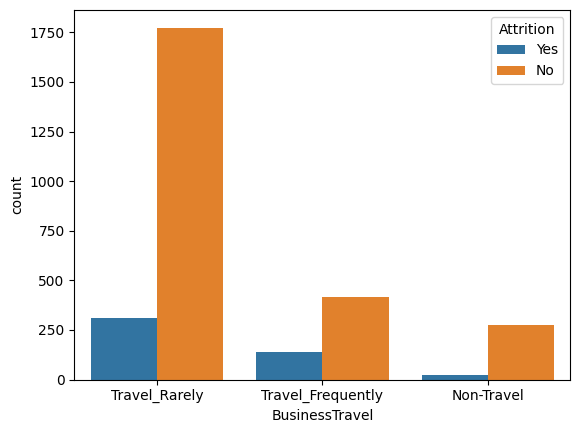

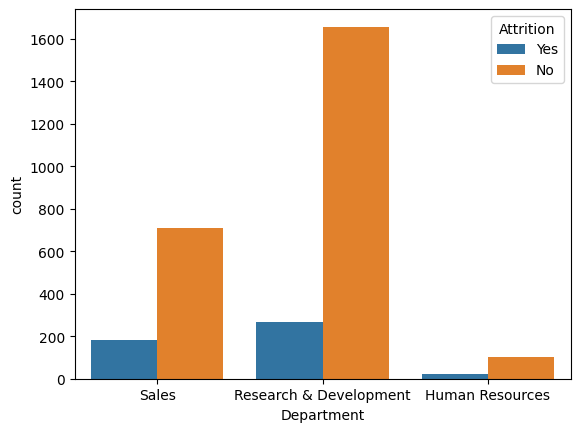

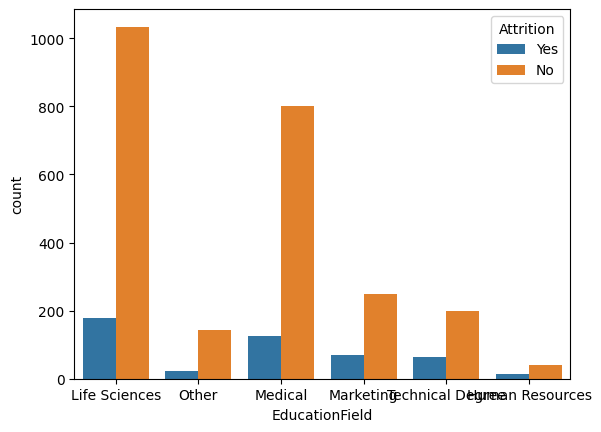

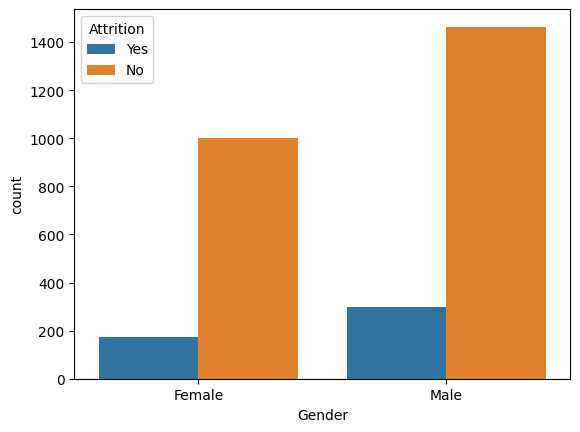

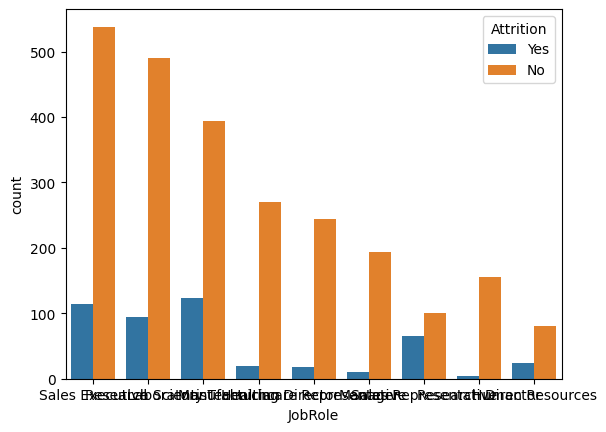

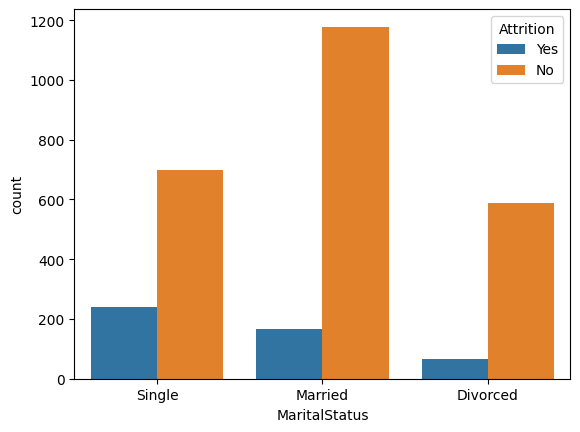

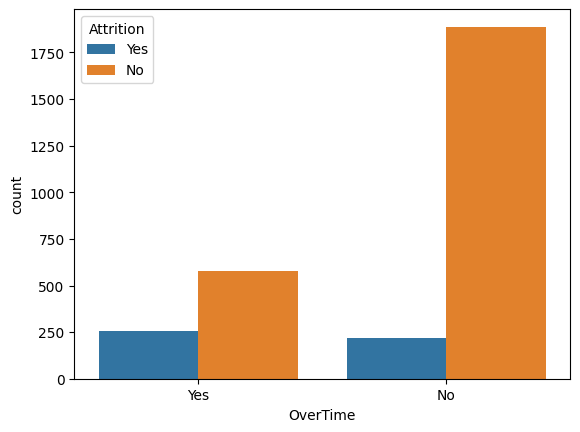

In [31]:
for feature in categorical_features:
    if feature in df_hr.columns:  # Check if feature still exists in the DataFrame
        sns.countplot(x=feature, data=df_hr, hue='Attrition')
        plt.show()

Observation:
1. No attrition corresponds to abt 2400 and yes is less than 500 so we need oversampling as data isn't very big
2. Those who travel frequently:- more % attrition
3. Most employee are from Research and development so it has most attrition
4. female 1000 : 200 and male 1400 : 250 So nearly same % attrition observed
5. Among marital status singles are most likely to change companies. This goes hand in hand with Age observation.
Age 25 to 32-33 most attrition
6. Overtime has a great percentage of attrition. So it is a major factor

PERFORMING FEATURE SELECTION FOR CATEGORICAL SELECTION using chi2 Test

In [32]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [33]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelBinarizer


df_categorical = df_hr[categorical_features]

# Convert categorical features to numerical using LabelBinarizer
lb = LabelBinarizer()
for feature in categorical_features:
  if feature != 'Attrition':
    df_categorical[feature] = lb.fit_transform(df_categorical[feature])

# Separate features (X) and target (y)
X = df_categorical.drop('Attrition', axis=1)
y = df_categorical['Attrition']

# Apply SelectKBest with chi2 for all features
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to visualize the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'p-value': p_values})
print(feature_scores.sort_values(by='Score', ascending=False))

          Feature       Score       p-value
6        OverTime  127.690133  1.312092e-29
5   MaritalStatus   17.588844  2.741922e-05
4         JobRole   16.585037  4.651658e-05
0  BusinessTravel   14.635868  1.304088e-04
2  EducationField    3.837755  5.011057e-02
3          Gender    1.020173  3.124780e-01
1      Department    0.797253  3.719160e-01


<ipython-input-33-3553530f79e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feature] = lb.fit_transform(df_categorical[feature])
<ipython-input-33-3553530f79e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feature] = lb.fit_transform(df_categorical[feature])
<ipython-input-33-3553530f79e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In chi2 Test high score and low p value means higher imp feature
---

### Feature Selection Results

1. **OverTime**
   - **Score**: 127.69
   - **p-value**: 1.31e-29
   - **Interpretation**: Strong predictor of attrition. **Keep**.

2. **MaritalStatus**
   - **Score**: 17.59
   - **p-value**: 2.74e-05
   - **Interpretation**: Significant association. **Keep**.

3. **JobRole**
   - **Score**: 16.59
   - **p-value**: 4.65e-05
   - **Interpretation**: Important feature. **Keep**.

4. **BusinessTravel**
   - **Score**: 14.64
   - **p-value**: 1.30e-04
   - **Interpretation**: Significant influence. **Keep**.

5. **EducationField**
   - **Score**: 3.84
   - **p-value**: 0.050
   - **Interpretation**: Marginally significant. **Consider including**.

6. **Gender**
   - **Score**: 1.02
   - **p-value**: 0.312
   - **Interpretation**: Not significant. **Exclude**.

7. **Department**
   - **Score**: 0.80
   - **p-value**: 0.372
   - **Interpretation**: Not significant. **Exclude**.



In [34]:

if 'Gender' in df_hr.columns:
    df_hr.drop(['Gender'], axis=1, inplace=True)

if 'Department' in df_hr.columns:
    df_hr.drop(['Department'], axis=1, inplace=True)

# Remove 'Gender' and 'Department' from categorical_features if they exist
if 'Gender' in categorical_features:
    categorical_features.remove('Gender')

if 'Department' in categorical_features:
    categorical_features.remove('Department')



In [35]:

df_hr.shape

(2940, 29)

In [36]:
categorical_features

['Attrition',
 'BusinessTravel',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [37]:

df_encoded = pd.get_dummies(df_hr, columns=[feature for feature in categorical_features if feature != 'Attrition'],
                             drop_first=True)# Now df_encoded contains one-hot encoded features.
df_encoded

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,Yes,41,1102,0.693147,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,No,49,279,2.197225,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,Yes,37,1373,1.098612,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,No,33,1392,1.386294,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,No,27,591,1.098612,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,884,3.178054,2,3,41,4,2,4,...,True,False,False,False,False,False,False,True,False,False
2936,No,39,613,1.945910,1,4,42,2,3,1,...,False,False,False,False,False,False,False,True,False,False
2937,No,27,155,1.609438,3,2,87,4,2,2,...,False,False,True,False,False,False,False,True,False,True
2938,No,49,1023,1.098612,3,4,63,2,2,2,...,False,False,False,False,False,True,False,True,False,False


In [38]:

df_encoded = df_encoded.replace({True: 1, False: 0})

# Replace 'Yes' with 1 and 'No' with 0 in the 'Attrition' column
df_encoded['Attrition'] = df_encoded['Attrition'].replace({'Yes': 1, 'No': 0})

<ipython-input-38-038814a7afcb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})
<ipython-input-38-038814a7afcb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Attrition'] = df_encoded['Attrition'].replace({'Yes': 1, 'No': 0})


In [39]:
df_encoded.columns

Index(['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representati

In [40]:
# List of feature names
features = [
    'Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'NumCompaniesWorked', 'PercentSalaryHike',
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
    'EducationField_Life Sciences', 'EducationField_Marketing',
    'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree', 'JobRole_Human Resources',
    'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director',
    'JobRole_Research Scientist', 'JobRole_Sales Executive',
    'JobRole_Sales Representative', 'MaritalStatus_Married',
    'MaritalStatus_Single', 'OverTime_Yes'
]

# Check for duplicates
duplicates = set([feature for feature in features if features.count(feature) > 1])

if duplicates:
    print(f"Duplicate features found: {duplicates}")
else:
    print("No duplicates found.")


No duplicates found.


In [41]:
df_encoded

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,41,1102,0.693147,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,0,49,279,2.197225,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,1,37,1373,1.098612,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,0,33,1392,1.386294,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,0,27,591,1.098612,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,36,884,3.178054,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
2936,0,39,613,1.945910,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
2937,0,27,155,1.609438,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
2938,0,49,1023,1.098612,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [42]:
# prompt: train test split

from sklearn.model_selection import train_test_split

# Assuming 'Attrition' is your target variable
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2352, 41)
X_test shape: (588, 41)
y_train shape: (2352,)
y_test shape: (588,)


In [43]:
# prompt: x_train attrition 1 and 0 value count

print(y_train.value_counts())

Attrition
0    1977
1     375
Name: count, dtype: int64


In [44]:
# prompt: use SMOTE ON TRAIN DATA

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Attrition
0    1977
1    1977
Name: count, dtype: int64


In [45]:

from sklearn.preprocessing import MinMaxScaler

# Assuming X_train_resampled and X_test are your training and testing feature data
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled feature data

FINAL DATA:
X_train_scaled: The resampled training features.

y_train_resampled: The resampled training target.

X_test_scaled: The original testing features.

y_test: The original testing target.

In [46]:
X_train_scaled

array([[0.30952381, 0.41947029, 0.51191605, ..., 0.        , 0.        ,
        0.        ],
       [0.38095238, 0.11166786, 0.88546928, ..., 0.        , 1.        ,
        0.        ],
       [0.4047619 , 0.5583393 , 0.25595802, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64285714, 0.21689334, 0.42296817, ..., 0.        , 0.        ,
        0.        ],
       [0.4047619 , 0.43163923, 0.82612446, ..., 0.        , 0.        ,
        0.        ],
       [0.23809524, 0.19613457, 0.89244932, ..., 0.        , 0.        ,
        0.        ]])

In [47]:
X_test_scaled

array([[0.19047619, 0.91768074, 0.25595802, ..., 1.        , 0.        ,
        0.        ],
       [0.5952381 , 0.22906228, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.01002147, 0.71856502, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.78571429, 0.4781675 , 0.40568387, ..., 0.        , 0.        ,
        1.        ],
       [0.38095238, 0.98639943, 0.3383581 , ..., 1.        , 0.        ,
        1.        ],
       [0.71428571, 0.83035075, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [48]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import RandomizedSearchCV

# # Define a simplified hyperparameter grid for Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],          # Number of trees in the forest
#     'max_depth': [5, 10, 15, None],          # Maximum depth of the tree
#     'max_features': ['sqrt', 'log2'],        # Number of features considered for splitting
#     'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4]            # Minimum samples required at each leaf node
# }

# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Set up RandomizedSearchCV with 5-fold cross-validation
# random_search = RandomizedSearchCV(
#     estimator=rf_classifier,
#     param_distributions=param_grid,
#     n_iter=10,                # Number of parameter settings sampled (can increase)
#     scoring='accuracy',       # Metric to evaluate during cross-validation
#     cv=5,                     # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1                 # Use all CPU cores available
# )

# # Fit on training data
# random_search.fit(X_train_scaled, y_train_resampled)

# # Get the best model from the search
# best_rf = random_search.best_estimator_

# # Make predictions on the test data
# y_pred_rf = best_rf.predict(X_test_scaled)

# # Evaluate the model's performance
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("Best Random Forest Model Accuracy:", accuracy_rf)

# print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# print("\nBest Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# # Print the best parameters found by RandomizedSearchCV
# print("\nBest Hyperparameters:\n", random_search.best_params_)


In [49]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier with the specified parameters
rf_classifier = RandomForestClassifier(max_features=0.2, max_samples=1.0, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9761904761904762

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.98      0.88      0.93        99

    accuracy                           0.98       588
   macro avg       0.98      0.94      0.96       588
weighted avg       0.98      0.98      0.98       588


Random Forest Confusion Matrix:
 [[487   2]
 [ 12  87]]


BEST RF
Best Hyperparameters:
 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

**0.9778911564625851**

In [50]:
# prompt: apply knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier on the resampled training data
knn_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8231292517006803

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       489
           1       0.48      0.67      0.56        99

    accuracy                           0.82       588
   macro avg       0.70      0.76      0.72       588
weighted avg       0.85      0.82      0.83       588


KNN Confusion Matrix:
 [[418  71]
 [ 33  66]]


In [51]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Define a simplified hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],   # Learning rate for shrinkage
    'max_depth': [3, 5, 7]               # Maximum tree depth
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,               # Number of parameter settings sampled
    scoring='accuracy',      # Metric to evaluate during cross-validation
    cv=5,                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                # Use all CPU cores available
)

# Fit on training data
random_search.fit(X_train_scaled, y_train_resampled)

# Get the best model from the search
best_xgb = random_search.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Best XGBoost Model Accuracy:", accuracy_xgb)

print("\nBest XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

print("\nBest XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Print the best parameters found by RandomizedSearchCV
print("\nBest Hyperparameters:\n", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:17:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Model Accuracy: 0.9727891156462585

Best XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       489
           1       0.96      0.88      0.92        99

    accuracy                           0.97       588
   macro avg       0.97      0.94      0.95       588
weighted avg       0.97      0.97      0.97       588


Best XGBoost Confusion Matrix:
 [[485   4]
 [ 12  87]]

Best Hyperparameters:
 {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


**CHOSEN MODEL** :
**Best Hyperparameters**:
 {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}

 **Best XGBoost Model Accuracy**: 0.9812925170068028

In [52]:

xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


xgb_classifier.fit(X_train_scaled, y_train_resampled)

y_pred_xgb = xgb_classifier.predict(X_test_scaled)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)

print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9812925170068028

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.98      0.91      0.94        99

    accuracy                           0.98       588
   macro avg       0.98      0.95      0.97       588
weighted avg       0.98      0.98      0.98       588


XGBoost Confusion Matrix:
 [[487   2]
 [  9  90]]


In [53]:

X_test_first_10 = X_test_scaled[:10]

y_test_first_10 = y_test[:10]

y_pred_first_10 = xgb_classifier.predict(X_test_first_10)


for i in range(10):
  print(f"Row {i+1}:")
  print(f"Original Value: {y_test_first_10.iloc[i]}")
  print(f"Predicted Value: {y_pred_first_10[i]}")
  print("---")

Row 1:
Original Value: 0
Predicted Value: 0
---
Row 2:
Original Value: 0
Predicted Value: 0
---
Row 3:
Original Value: 0
Predicted Value: 0
---
Row 4:
Original Value: 1
Predicted Value: 1
---
Row 5:
Original Value: 0
Predicted Value: 0
---
Row 6:
Original Value: 0
Predicted Value: 0
---
Row 7:
Original Value: 0
Predicted Value: 0
---
Row 8:
Original Value: 0
Predicted Value: 0
---
Row 9:
Original Value: 0
Predicted Value: 0
---
Row 10:
Original Value: 1
Predicted Value: 1
---


**TRYING OUT THE NEURAL NETWORKS APPROACH**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.6042 - loss: 0.6402 - val_accuracy: 0.5866 - val_loss: 0.7479
Epoch 2/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7707 - loss: 0.4867 - val_accuracy: 0.8357 - val_loss: 0.3964
Epoch 3/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8388 - loss: 0.3884 - val_accuracy: 0.8875 - val_loss: 0.2857
Epoch 4/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8543 - loss: 0.3440 - val_accuracy: 0.8913 - val_loss: 0.2461
Epoch 5/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8811 - loss: 0.3007 - val_accuracy: 0.8963 - val_loss: 0.2574
Epoch 6/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8864 - loss: 0.2769 - val_accuracy: 0.9115 - val_loss: 0.2028
Epoch 7/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9000 - loss: 0.2580 - val_accuracy: 0.8837 - val_loss: 0.2431
Epoch 8/60
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8940 - loss: 0.2502 - val_accuracy: 0.9077 - val_lo

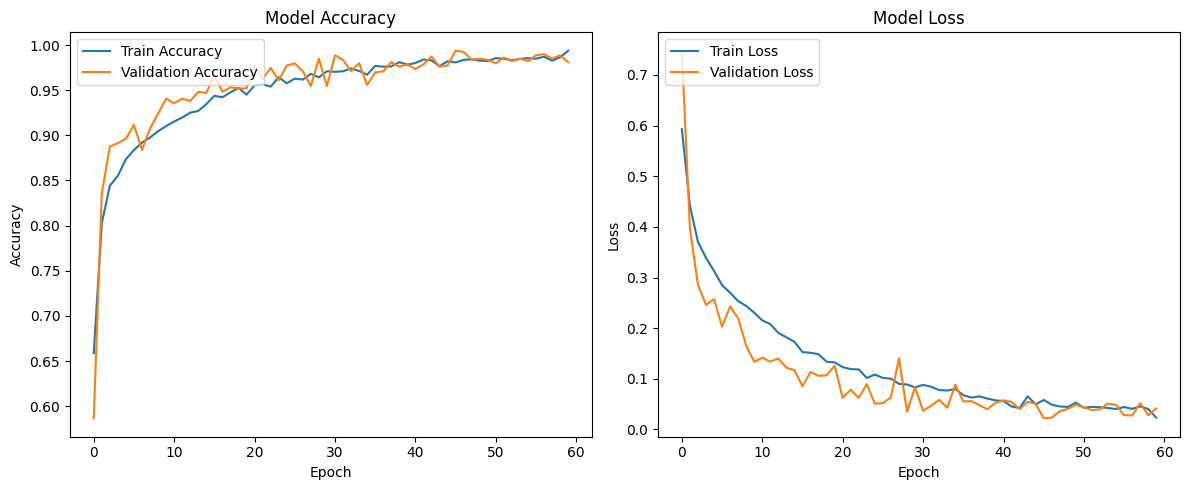

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),  # Adjusted dropout rate
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Another dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a learning rate scheduler
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Experiment with the learning rate
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(X_train_scaled, y_train_resampled, epochs=60, validation_split=0.2, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)

# Make predictions on the test set
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the model's performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\nNeural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Plot training history for better insights
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Neural Network achieving 97.8 accuracy**

In [55]:
import pickle


In [56]:

filename = 'xgb_classifier.pkl'
pickle.dump(xgb_classifier, open(filename, 'wb'))